# Identifying High-Risk Texas Counties for Hurricane Impact Using Latitude and Population Data

## Backstory: 
Hello, we are young researchers specializing in Geographic Information Systems (GIS) analysis, we are currently engaged in a project commissioned by the state of Texas. Our task is to discern the spatial patterns of Texas counties, particularly in relation to natural disasters such as hurricanes. This endeavor aims to enhance our understanding of geographical vulnerabilities and aid in proactive disaster management and response strategies.

## Introduction:
We investigated the spatial dynamics of longitude and latitude coordinates using scatterplots and descriptive statistics in order to clarify geographical subtleties and clustering phenomena. Through research we discovered that hurricane prone zones lie between latitudes 5-30 coordinates. In this analysis, we will observe the zones in Texas counties.

We first read in the Texas Counties GIS data and cleaned it by removing missing values and duplicated rows.
Below is our cleaned data.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



gis_data = pd.read_csv('Texas_Counties_GIS_Data_Final.csv')

gis_data_clean = gis_data.dropna()

print("Number of duplicate rows:", gis_data.duplicated().sum())

gis_data_clean = gis_data_clean.drop_duplicates()

print(gis_data_clean)

Number of duplicate rows: 0
       County  Code_Mailing  Code_Number    FIPS  X_Latitude  Y_Longitude  \
0    Anderson             1            1  48,001   31.813215   -95.652518   
1     Andrews             3            2  48,003   32.305063  -102.637884   
2    Angelina             5            3  48,005   31.254759   -94.611742   
3     Aransas             7            4  48,007   28.127096   -96.992590   
4      Archer             9            5  48,009   33.615392   -98.687834   
..        ...           ...          ...     ...         ...          ...   
249      Wood           499          250  48,499   32.786344   -95.382065   
250    Yoakum           501          251  48,501   33.172935  -102.827879   
251     Young           503          252  48,503   33.176708   -98.687814   
252    Zapata           505          253  48,505   27.000891   -99.168601   
253    Zavala           507          254  48,507   28.865306   -99.761020   

                    Centroid_Location  Shape_Le

In this code, we created two subplots to visualize all counties latitude and longitude coordinates vs. counties with coordinates bewteen 5-30 (hurricane prone zones). The first subplot displays the longitude and latitude coordinates of Texas counties using a scatter plot, with each county represented by a different color. The second subplot highlights counties most likely to be impacted by hurricanes, distinguishing them from other counties based on their latitude coordinates. Notably in the hurricane prone zones are more south. 

<function matplotlib.pyplot.show(close=None, block=None)>

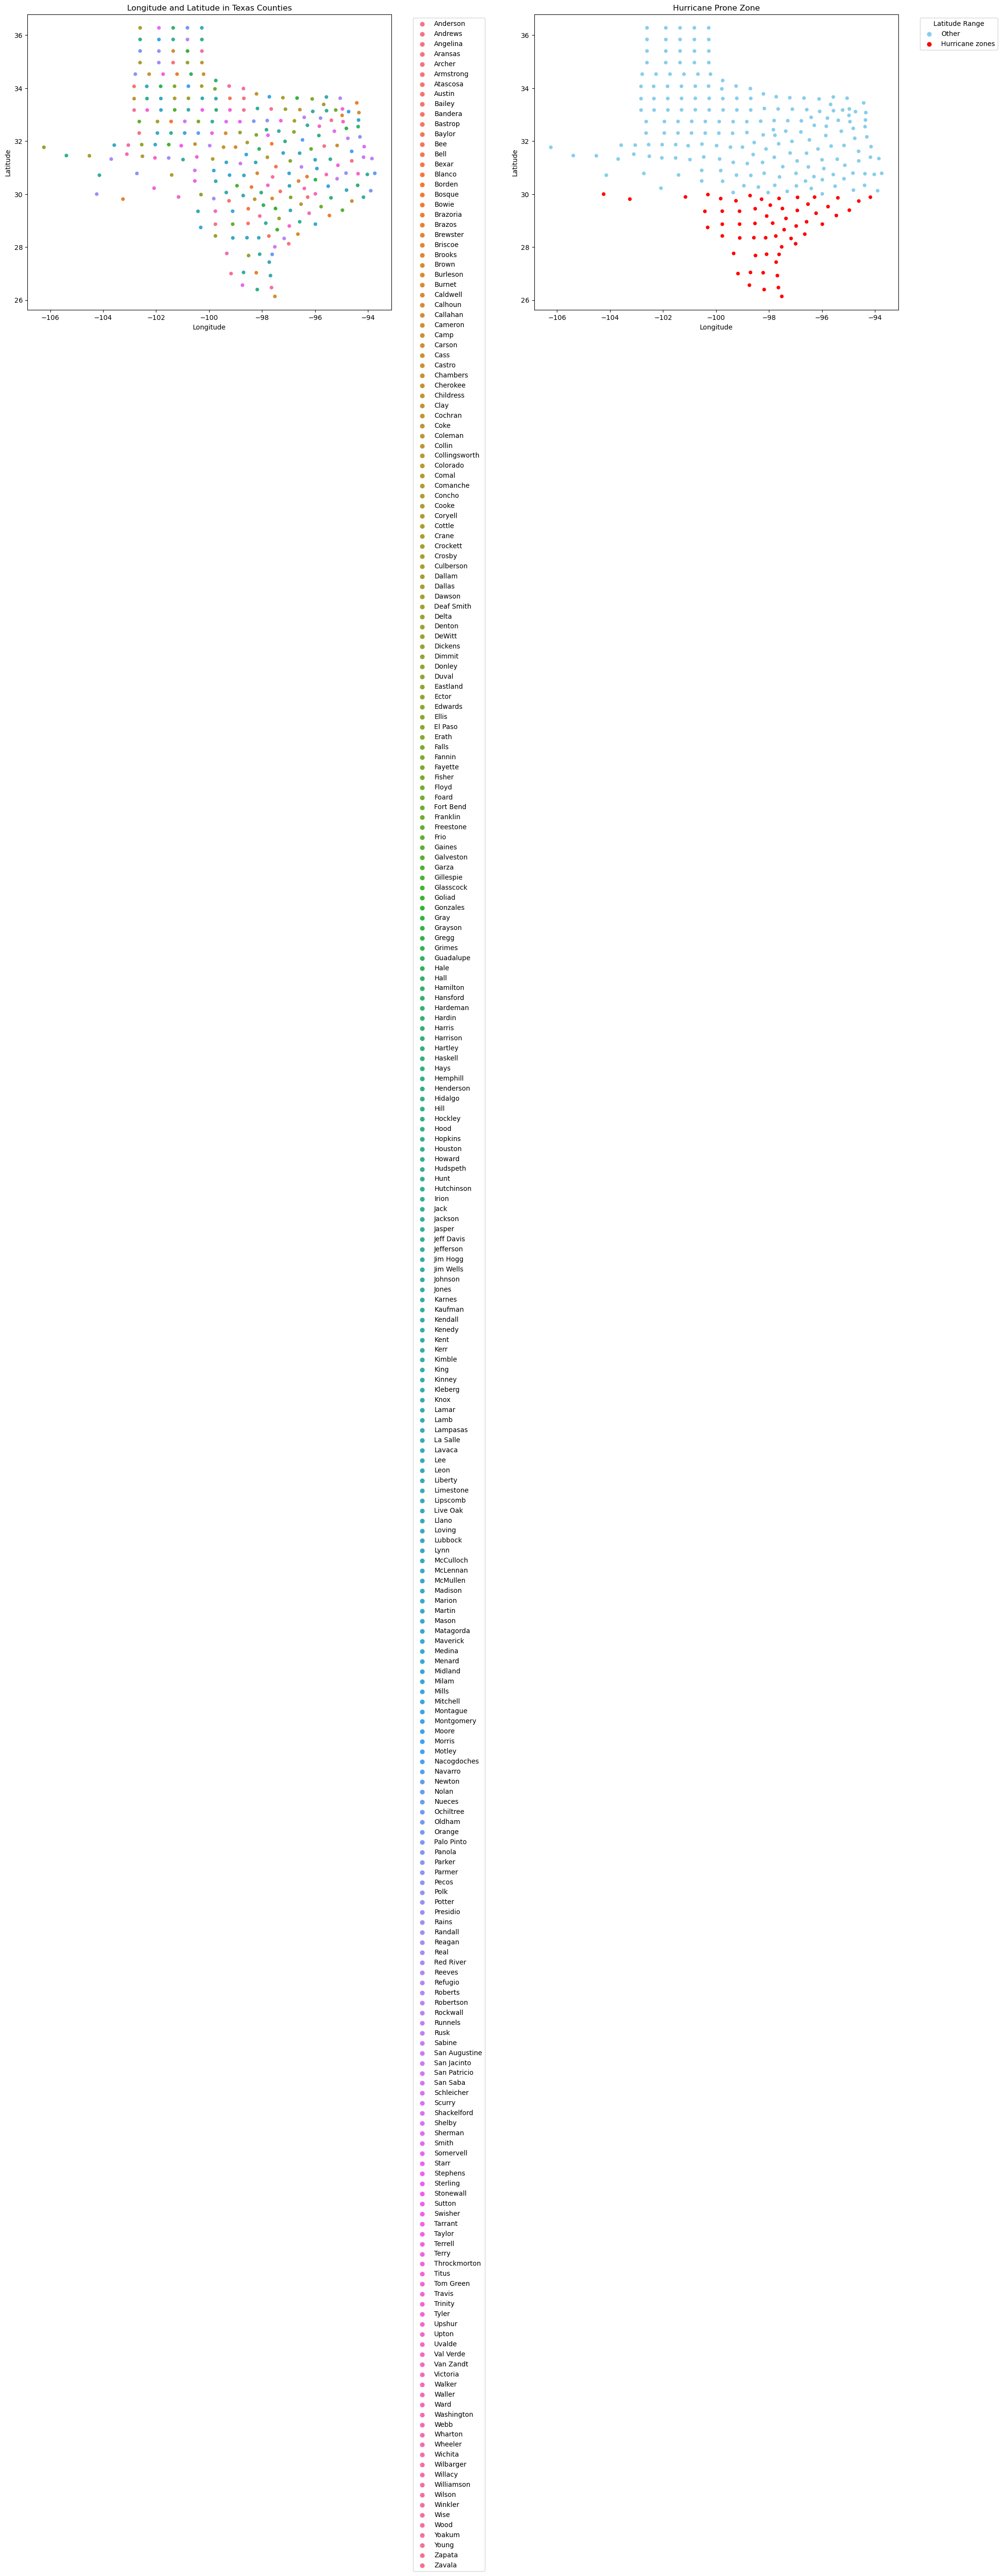

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(25, 8))

# Plot 1: Longitude and Latitude in Texas Counties
sns.scatterplot(x='Y_Longitude', y='X_Latitude', data=gis_data_clean, hue='County', ax=axes[0])
axes[0].set_title('Longitude and Latitude in Texas Counties')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_aspect('equal', adjustable='box')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Counties most likely to get hit by Hurricanes
gis_data_clean['Latitude_Range'] = gis_data_clean['X_Latitude'].apply(lambda x: 'Hurricane zones' if 5 <= x <= 30 else 'Other')
sns.scatterplot(x='Y_Longitude', y='X_Latitude', data=gis_data_clean, hue='Latitude_Range', palette=['skyblue', 'red'], legend='full', ax=axes[1])
axes[1].set_title('Hurricane Prone Zone')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_aspect('equal', adjustable='box')
axes[1].legend(title='Latitude Range', bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the subplots

plt.show

The mean latitude for all counties is 31.66 coordinates showing Texas is overall pretty susceptible to Hurricanes, however the sountern most counties bare the largest risk with a mean latitude of 28.74 coordinates.

In [105]:
overall_mean_latitude = gis_data_clean['X_Latitude'].mean()

print("Mean Latitude for All Counties:", overall_mean_latitude)

filtered_counties = gis_data_clean[(gis_data_clean['X_Latitude'] >= 5) & (gis_data_clean['X_Latitude'] <= 30)]

# Calculate the mean latitude for the filtered counties
mean_latitude = filtered_counties['X_Latitude'].mean()

print("Mean Latitude for Counties with Latitudes between 5 and 30:", mean_latitude)

Mean Latitude for All Counties: 31.661100622047243
Mean Latitude for Counties with Latitudes between 5 and 30: 28.739005182203385


Below is a list of the counties in hurricane prone zones.

In [86]:
counties_in_hurricane_zones = gis_data_clean[gis_data_clean['Latitude_Range'] == 'Hurricane zones']

# Print the list of counties
print("Counties with latitudes between 5 and 30 (Hurricane zones):")
print(counties_in_hurricane_zones['County'].tolist())

Counties with latitudes between 5 and 30 (Hurricane zones):
['Aransas', 'Atascosa', 'Austin', 'Bandera', 'Bee', 'Bexar', 'Brazoria', 'Brewster', 'Brooks', 'Caldwell', 'Calhoun', 'Cameron', 'Chambers', 'Colorado', 'Comal', 'DeWitt', 'Dimmit', 'Duval', 'Edwards', 'Fayette', 'Fort Bend', 'Frio', 'Galveston', 'Goliad', 'Gonzales', 'Guadalupe', 'Harris', 'Hidalgo', 'Jackson', 'Jefferson', 'Jim Hogg', 'Jim Wells', 'Karnes', 'Kendall', 'Kenedy', 'Kinney', 'Kleberg', 'La Salle', 'Lavaca', 'Live Oak', 'McMullen', 'Matagorda', 'Maverick', 'Medina', 'Nueces', 'Presidio', 'Real', 'Refugio', 'San Patricio', 'Starr', 'Uvalde', 'Val Verde', 'Victoria', 'Webb', 'Wharton', 'Willacy', 'Wilson', 'Zapata', 'Zavala']


The jointplot visualizations indicate that counties are densely clustered in the northeast, notably outside the hurricane zone. Conversely, along coastal regions, counties exhibit a more dispersed distribution. Darker regions indicate areas where data points are more densely clustered, while lighter regions represent areas with sparser data points.

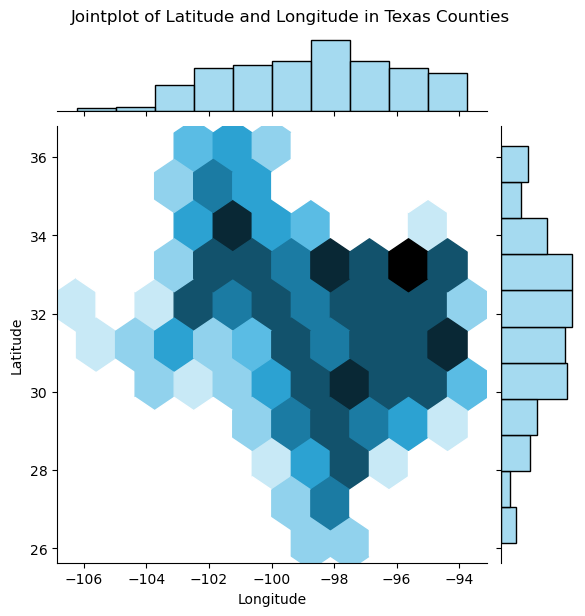

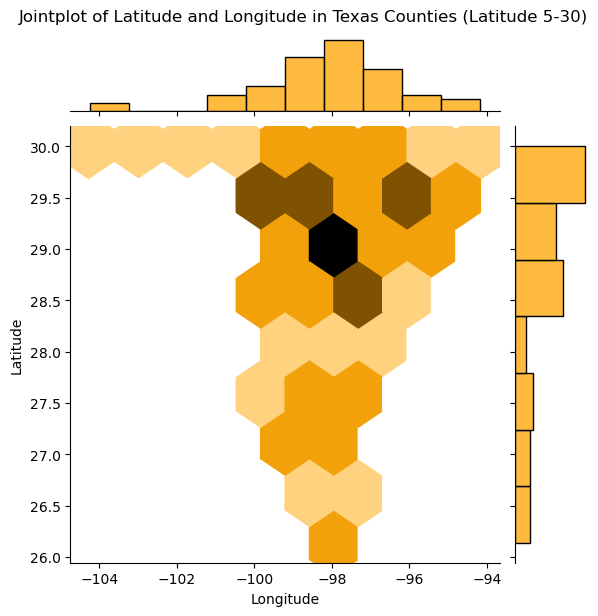

In [95]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Jointplot of Latitude and Longitude in Texas Counties
joint_plot_1 = sns.jointplot(x='Y_Longitude', y='X_Latitude', data=gis_data_clean, kind='hex', color='skyblue')
joint_plot_1.fig.suptitle('Jointplot of Latitude and Longitude in Texas Counties', y=1.02)
joint_plot_1.set_axis_labels('Longitude', 'Latitude')

# Plot 2: Jointplot of Latitude and Longitude in Texas Counties (Latitude 5-30)
filtered_data = gis_data_clean[(gis_data_clean['X_Latitude'] >= 5) & (gis_data_clean['X_Latitude'] <= 30)]
joint_plot_2 = sns.jointplot(x='Y_Longitude', y='X_Latitude', data=filtered_data, kind='hex', color='orange')
joint_plot_2.fig.suptitle('Jointplot of Latitude and Longitude in Texas Counties (Latitude 5-30)', y=1.02)
joint_plot_2.set_axis_labels('Longitude', 'Latitude')

# Show the plots
plt.show()


Based on this data we also wanted to see if there was any correlation of shape area and length of the counties in relation to it being more hurricane prone

C:\Users\semio\AppData\Local\Temp\ipykernel_7488\47405279.py:4: UserWarning: 
The palette list has fewer values (2) than needed (254) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Shape_Length', y='Shape_Area', data=gis_data, hue='County', palette=['red', 'green'])


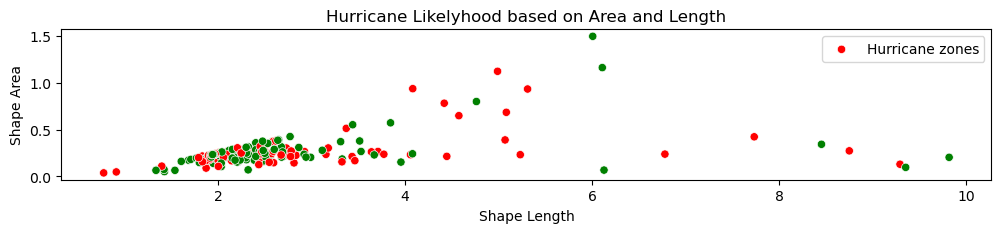

In [19]:
gis_data_clean['Latitude_Range'] = gis_data_clean['X_Latitude'].apply(lambda x: 'Hurricane zones' if 5 <= x <= 30 else 'Other')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Shape_Length', y='Shape_Area', data=gis_data, hue='County', palette=['red', 'green'])
plt.title('Hurricane Likelyhood based on Area and Length')
plt.xlabel('Shape Length')
plt.ylabel('Shape Area')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(labels=['Hurricane zones'], loc='upper right')
plt.show()

Interestingly, counties with larger shape lengths are more likely to be in the hurricane zone meaning a lot of these counties in the hurricane zones have a wider shape length.

Below we visulaized the top ten counties with the largest populations on a scale from 0 to 5 million.

In [97]:
pop_data = pd.read_csv('/Users/daniellebalque/Downloads/2022_txpopest_county.csv')

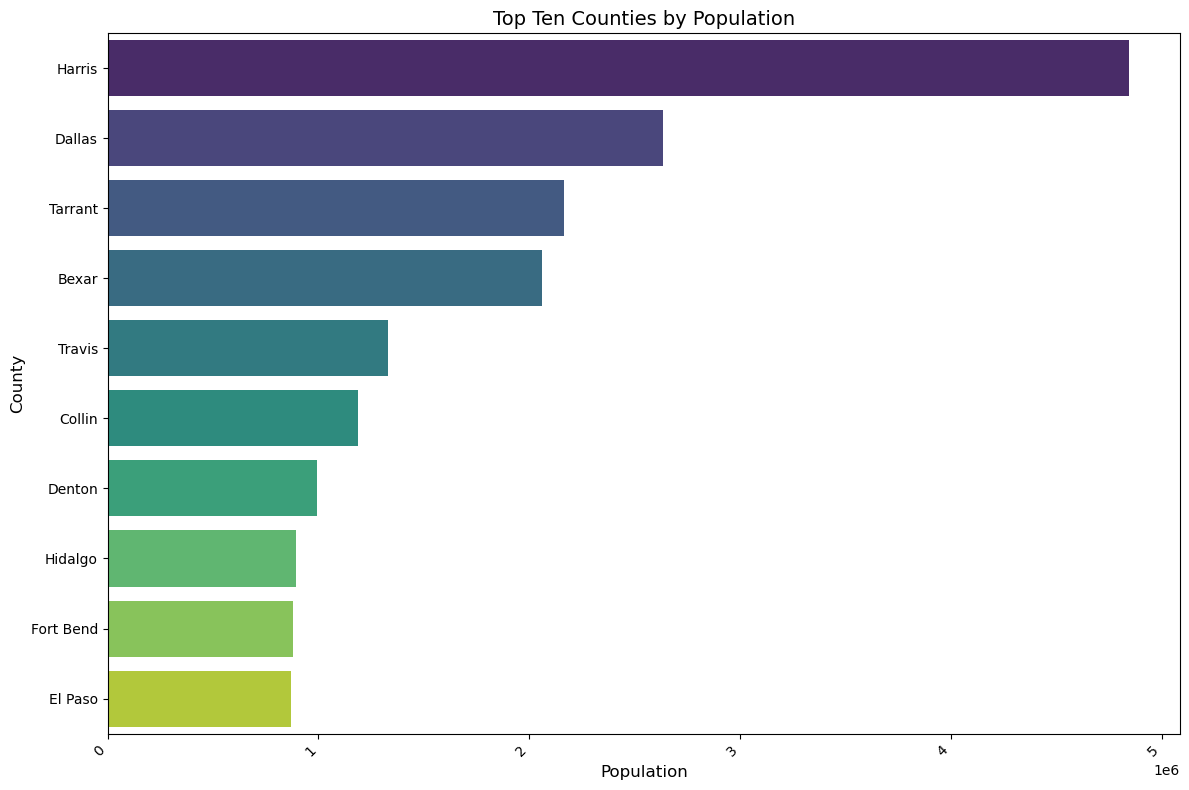

In [101]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering out 'State of Texas' from the DataFrame
pop_data = pop_data[pop_data['county'] != 'State of Texas']

# Sorting the DataFrame by population in descending order and selecting the top ten counties
top_ten_counties = pop_data.sort_values(by="jan1_2023_pop_est", ascending=False).head(10)

# Creating the plot
plt.figure(figsize=(12, 8))
sns.barplot(x="jan1_2023_pop_est", y="county", data=top_ten_counties, palette="viridis")

# Adding labels and title
plt.xlabel("Population", fontsize=12)
plt.ylabel("County", fontsize=12)
plt.title("Top Ten Counties by Population", fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjusting layout for better appearance
plt.tight_layout()

# Showing the plot
plt.show()


In order to locate our counties that would have the biggest hurricane impact we analyzed which counties intersected both the top ten largest populations and the hurricane-prone zones (latitudes between 5-30 coordinates).

In [99]:
biggest_impact_counties = []

# Iterate over counties in hurricane zones
for county in counties_in_hurricane_zones['County']:
    # Check if the county is in the top ten counties by population
    if county in top_ten_counties['county'].tolist():
        # Append the county to the list of biggest impact counties
        biggest_impact_counties.append(county)

# Print the list of counties with the biggest impact
print("Counties with the biggest impact from hurricanes and also in the top ten by population:")
print(biggest_impWact_counties)


Counties with the biggest impact from hurricanes and also in the top ten by population:
['Bexar', 'Fort Bend', 'Harris', 'Hidalgo']


This plot highlights the biggest impact counties with enlarged markers. These counties predominantly occupy the southernmost regions, with three of them situated along the coastal areas

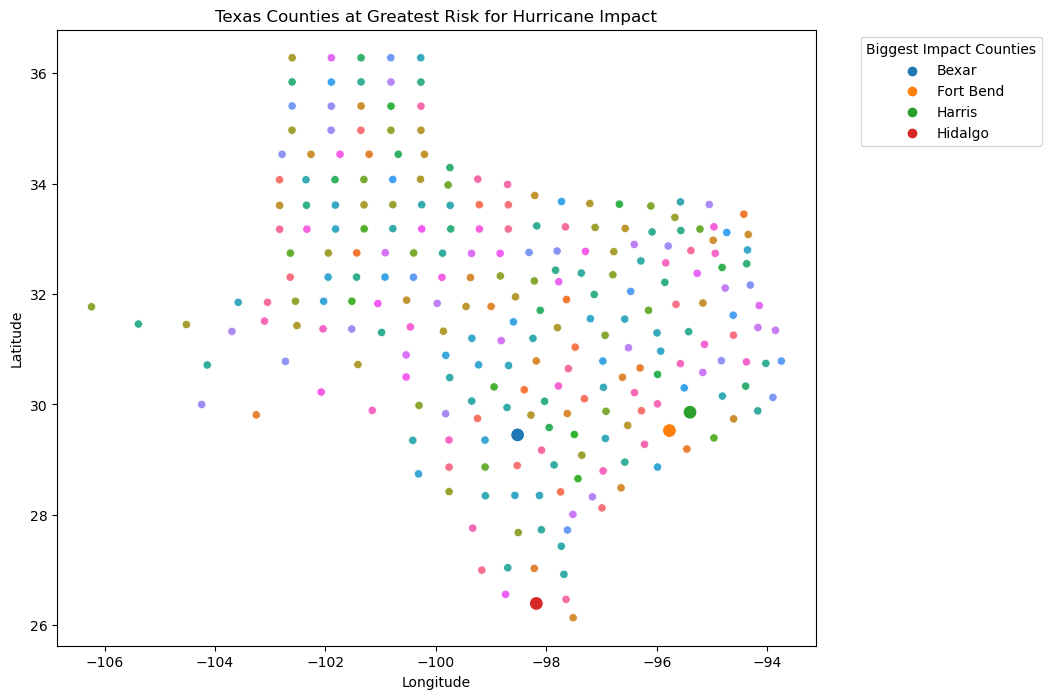

In [67]:
plt.figure(figsize=(12, 8))

# Plot all counties
sns.scatterplot(x='Y_Longitude', y='X_Latitude', data=gis_data_clean, hue='County', legend=False)

# Highlight counties with the biggest impact and create a legend for them
highlighted_counties = ['Bexar', 'Fort Bend', 'Harris', 'Hidalgo']
sns.scatterplot(x='Y_Longitude', y='X_Latitude', data=gis_data_clean[gis_data_clean['County'].isin(highlighted_counties)], hue='County', marker='o', s=100, legend='full')

plt.title('Texas Counties at Greatest Risk for Hurricane Impact')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(title='Biggest Impact Counties', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Conclusion:
